In [1]:
import pandas as pd
import numpy as np

In [16]:
ads = pd.read_csv('../../DataSets/Advertising.csv')

In [17]:
def Rsquared(y, yhat):
    ybar = np.mean(y)
    tss = np.sum((y - ybar)**2)
    rss = np.sum((y - yhat)**2)
    return 1 - rss/tss

In [18]:
x_tv = ads['TV'].to_numpy()
x_radio = ads['Radio'].to_numpy()
x_news = ads['Newspaper'].to_numpy()

In [19]:
n = len(x_tv)
A_tr = np.array([x_tv, x_radio, np.ones(n)]).T
A_tn = np.array([x_tv, x_news, np.ones(n)]).T
A_rn = np.array([x_radio, x_news, np.ones(n)]).T

In [20]:
y = ads['Sales'].to_numpy()

# regress with TV and Radio vars
Ai_tr = np.linalg.inv(A_tr.T@A_tr)
p_tr = Ai_tr@(A_tr.T@y)
# regress with TV and Newspaper vars
Ai_tn = np.linalg.inv(A_tn.T@A_tn)
p_tn = Ai_tn@(A_tn.T@y)
# regress with Radio and Newspaper vars
Ai_rn = np.linalg.inv(A_rn.T@A_rn)
p_rn = Ai_rn@(A_rn.T@y)

In [21]:
p_tr

array([0.04575482, 0.18799423, 2.92109991])

In [22]:
r2_tr = Rsquared(y, p_tr[0]*x_tv + p_tr[1]*x_radio + p_tr[2])
r2_tn = Rsquared(y, p_tn[0]*x_tv + p_tn[1]*x_news + p_tn[2])
r2_rn = Rsquared(y, p_rn[0]*x_radio + p_rn[1]*x_news + p_rn[2])

In [23]:
r2_tr, r2_tn, r2_rn

(np.float64(0.8971942610828957),
 np.float64(0.6458354938293271),
 np.float64(0.33270518395032256))

In [24]:
p_t = np.polyfit(x_tv, y, 1)
p_r = np.polyfit(x_radio, y, 1)
p_n = np.polyfit(x_news, y, 1)
Rsquared(y, p_t[0]*x_tv + p_t[1]), Rsquared(y, p_r[0]*x_radio + p_r[1]), Rsquared(y, p_n[0]*x_news + p_n[1])

(np.float64(0.611875050850071),
 np.float64(0.33203245544529525),
 np.float64(0.05212044544430516))

In [25]:
# regress with all three vars
A = np.array([x_tv, x_radio, x_news, np.ones(n)]).T
Ai = np.linalg.inv(A.T@A)
p = Ai@(A.T@y)

In [26]:
Rsquared(y, p[0]*x_tv + p[1]*x_radio + p[2]*x_news + p[3])

np.float64(0.8972106381789522)

In [27]:
len(x_tv), len(y)

(200, 200)

In [31]:
ixs = np.arange(200)

In [32]:
varied_tv, varied_radio, varied_news = [], [], []

In [33]:
# regress with all three vars, random 70 of them
for i in range(50):
    np.random.shuffle(ixs)
    A = np.array([x_tv[ixs[:70]], x_radio[ixs[:70]], x_news[ixs[:70]], np.ones(70)]).T
    Ai = np.linalg.inv(A.T@A)
    p = Ai@(A.T@(y[:70]))
    varied_tv.append(p[0])
    varied_radio.append(p[1])
    varied_news.append(p[2])

In [35]:
# regress with all three vars
A = np.array([x_tv, x_radio, x_news, np.ones(n)]).T
Ai = np.linalg.inv(A.T@A)
p = Ai@(A.T@y)

In [37]:
np.std(varied_tv)/p[0], np.std(varied_radio)/p[1], np.std(varied_news)/p[2]

(np.float64(0.16334106396801426),
 np.float64(0.26435076991918866),
 np.float64(-28.87899820053057))

In [38]:
vary1_news = []

In [39]:
ixs = np.arange(200)

In [40]:
# regress with just news, random 70 of them
for i in range(50):
    np.random.shuffle(ixs)
    A = np.array([x_news[ixs[:70]], np.ones(70)]).T
    Ai = np.linalg.inv(A.T@A)
    p1 = Ai@(A.T@(y[:70]))
    vary1_news.append(p1[0])

In [41]:
# with all the data
A = np.array([x_news, np.ones(n)]).T
Ai = np.linalg.inv(A.T@A)
p = Ai@(A.T@y)

In [43]:
np.std(vary1_news)/p[0]

np.float64(0.5028635782510107)

In [3]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

In [4]:
coll = pd.read_csv('../../DataSets/College.csv')

In [5]:
big_coll = coll[coll['Apps'] > 2500]

In [6]:
big_coll.columns

Index(['School', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')

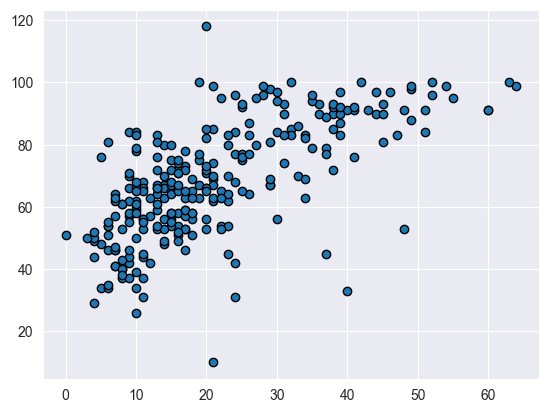

In [7]:
plt.scatter(big_coll['perc_alumni'], big_coll['Grad_Rate'], edgecolors='black')
plt.show()

In [8]:
p = np.polyfit(big_coll['Top10perc'], big_coll['Top25perc'], 1)
pq = np.polyfit(big_coll['Top10perc'], big_coll['Top25perc'], 2)

In [12]:
xx = np.linspace(0,96)

In [10]:
p

array([ 0.84525826, 34.84078201])

In [14]:
pq

array([-9.67092592e-03,  1.71873575e+00,  2.11109448e+01])

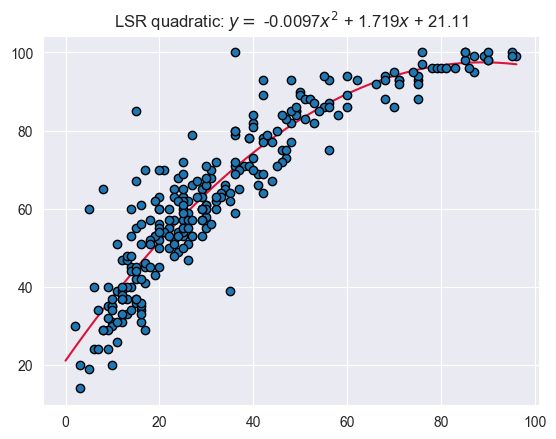

In [15]:
plt.scatter(big_coll['Top10perc'], big_coll['Top25perc'], edgecolors='black',zorder=3)
plt.plot(xx, pq[0]*(xx**2) + pq[1]*xx + pq[2], c='crimson')
#plt.plot(xx, p[0]*xx + p[1], c='xkcd:tangerine')
#plt.title(r'LSR line: $y =$ 0.845$x$ + 34.84')
plt.title(r'LSR quadratic: $y =$ -0.0097$x^2$ + 1.719$x$ + 21.11')
plt.show()

In [44]:
top10 = big_coll['Top10perc'].to_numpy()
top25 = big_coll['Top25perc'].to_numpy()
Rsquared(top25, pq[0]*(top10**2) + pq[1]*top10 + pq[2])

np.float64(0.8536608760025126)

In [45]:
Rsquared(top25, p[0]*top10 + p[1])

np.float64(0.7914351037354119)

In [46]:
pc = np.polyfit(big_coll['Top10perc'], big_coll['Top25perc'], 3)

In [47]:
Rsquared(top25, pc[0]*(top10**3) + pc[1]*(top10**2) + pc[2]*top10 + pc[3])

np.float64(0.8541457843645264)